**Task 2: Customer Segmentation Using Unsupervised Learning**

**Objective:**

Cluster customers based on spending habits and propose marketing strategies tailored to each
segment

**EDA (Exploratory Data Analysis)**

First 5 rows of dataset:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Summary Statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


C:\Users\Shaheer Bilal\AppData\Local\Temp\ipykernel_12832\1205267781.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=malldf, palette="pastel")


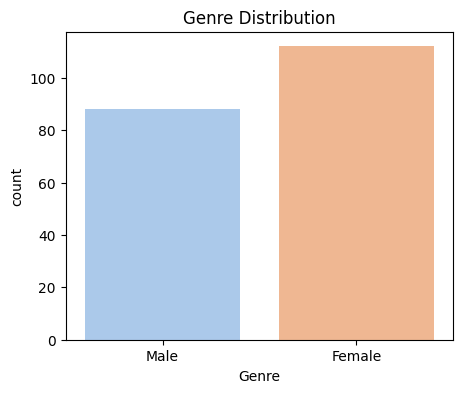

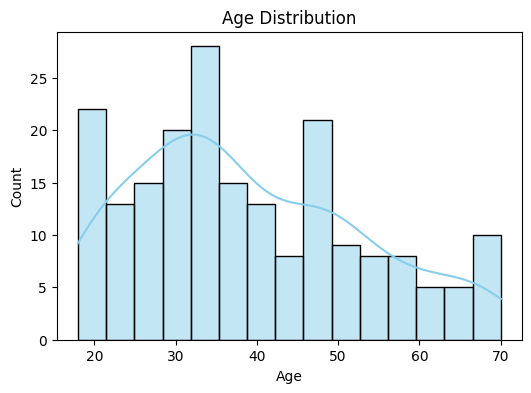

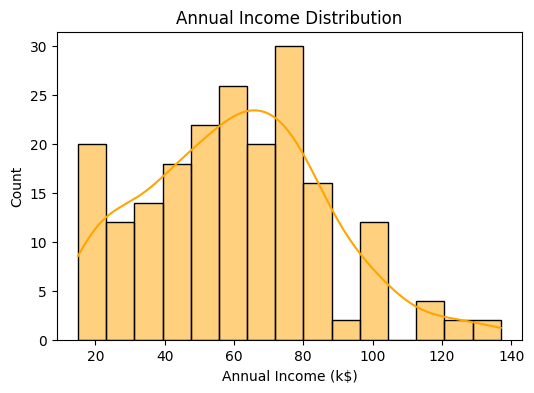

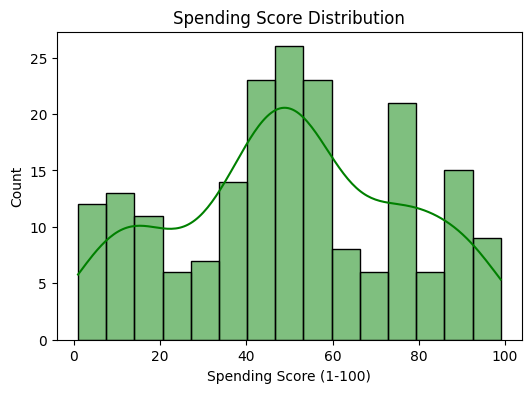

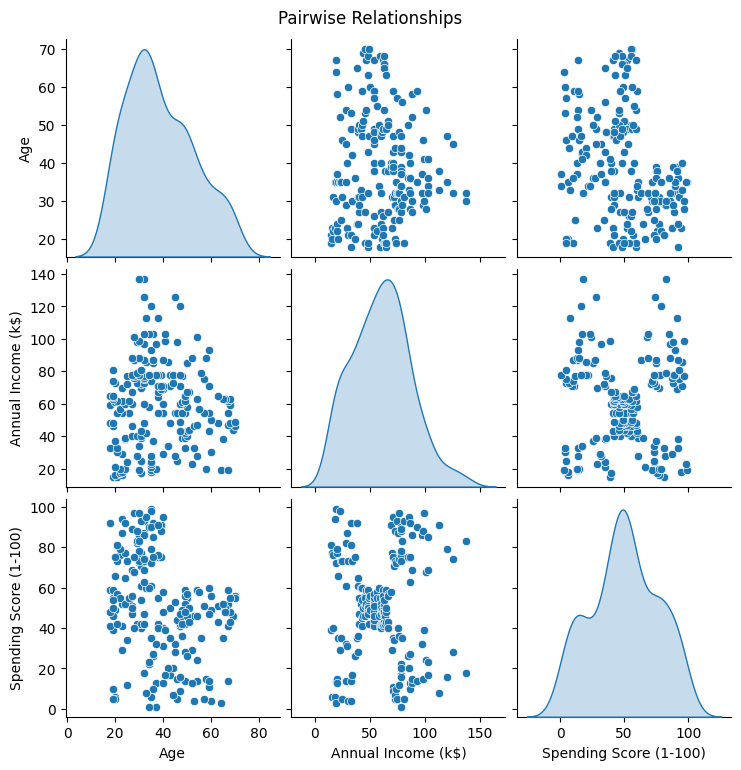

C:\Users\Shaheer Bilal\AppData\Local\Temp\ipykernel_12832\1205267781.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Age', data=malldf, ax=axes[0], palette="Set2")
C:\Users\Shaheer Bilal\AppData\Local\Temp\ipykernel_12832\1205267781.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Annual Income (k$)', data=malldf, ax=axes[1], palette="Set2")
C:\Users\Shaheer Bilal\AppData\Local\Temp\ipykernel_12832\1205267781.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Spending Score (1-100)', data=

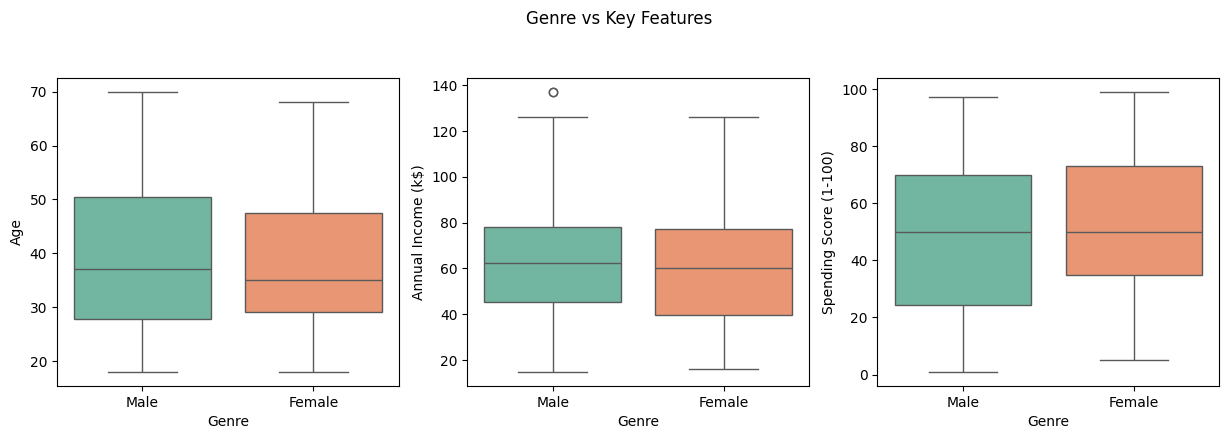

In [6]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load Dataset
malldf = pd.read_csv("Mall_Customers.csv")

# EDA (Exploratory Data Analysis)
print("First 5 rows of dataset:")
display(malldf.head())

print("\nDataset Info:")
print(malldf.info())

print("\nSummary Statistics:")
display(malldf.describe())

#Visualizations
# Genre distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Genre', data=malldf, palette="pastel")
plt.title("Genre Distribution")
plt.show()

# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(malldf['Age'], bins=15, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.show()

# Annual Income distribution
plt.figure(figsize=(6,4))
sns.histplot(malldf['Annual Income (k$)'], bins=15, kde=True, color="orange")
plt.title("Annual Income Distribution")
plt.show()

# Spending Score distribution
plt.figure(figsize=(6,4))
sns.histplot(malldf['Spending Score (1-100)'], bins=15, kde=True, color="green")
plt.title("Spending Score Distribution")
plt.show()

# Relationship plots
sns.pairplot(malldf[['Age','Annual Income (k$)','Spending Score (1-100)']], diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

# Boxplots for Genre vs Numeric features
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.boxplot(x='Genre', y='Age', data=malldf, ax=axes[0], palette="Set2")
sns.boxplot(x='Genre', y='Annual Income (k$)', data=malldf, ax=axes[1], palette="Set2")
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=malldf, ax=axes[2], palette="Set2")
fig.suptitle("Genre vs Key Features", y=1.05)
plt.show()

Here's a breakdown of what each visualization means:

1. **Genre Distribution:**

This is a bar plot (specifically, a countplot from the seaborn library).

It shows the distribution of customers by gender (Male and Female).

The visualization indicates that there are more female customers than male customers.

2. **Age Distribution:**

This is a histogram with a kernel density estimate (KDE) curve.

It shows the distribution of customer ages.

The plot suggests that the majority of customers are in their late 20s and early 30s. The curve shows a peak around this age range, and another smaller peak around 40s. The distribution is somewhat skewed to the left, indicating a younger customer base.

3. **Annual Income Distribution:**

Similar to the age distribution, this is a histogram with a KDE curve.

It shows the distribution of customer annual incomes (in thousands of dollars, or k$).

The plot shows that the highest frequency of customers have an annual income between $40k and $80k. The distribution appears roughly normal, centered around this range.

4. **Spending Score Distribution:**

This is another histogram with a KDE curve.

It shows the distribution of "Spending Score," a value between 1 and 100 assigned by the mall to customers based on their behavior.

The plot reveals that the spending scores are fairly well-distributed, with a peak around the 40-60 range. This suggests a large number of customers have a moderate spending score, with fewer at the very low or very high ends.

5. **Pairwise Relationships:**

This is a pair plot, which is a grid of plots showing the relationships between multiple variables.

The diagonal plots are kernel density plots for each variable (Age, Annual Income, and Spending Score), showing their individual distributions (similar to the single histograms shown earlier).

The off-diagonal plots are scatter plots showing the relationship between two variables:

Age vs. Annual Income: The scatter plot doesn't show a strong linear correlation, but there's a wider spread of income among younger adults (20s-30s) and a narrower, lower income range for older customers.

Age vs. Spending Score: This scatter plot reveals a few interesting patterns. Customers in their 20s and early 30s tend to have a wider range of spending scores, including some very high scores. The spending score seems to decrease with age.

Annual Income vs. Spending Score: This is a crucial plot for customer segmentation. It clearly shows distinct clusters of customers, which is a strong indicator that a clustering algorithm like K-Means would be effective. We can see clusters for high-income/low-spending, high-income/high-spending, low-income/low-spending, low-income/high-spending, and a large middle-of-the-road cluster. These clusters represent different customer segments.

6. **Gender vs. Key Features:**

This is a set of box plots.

They compare the distribution of Age, Annual Income, and Spending Score for Male and Female customers.

Age: The box plots show that the median age for both genders is similar, but the interquartile range (IQR) for females is slightly lower, suggesting they might, on average, be slightly younger than the male customers.

Annual Income: The median annual income for both genders is nearly identical, indicating no significant difference in income distribution between males and females in this dataset.

Spending Score: This is a key insight. The box plot shows that the median spending score for female customers is higher than for male customers. This suggests that, as a group, female customers tend to have higher spending scores.

**Performing clustering model and visualizing clusters**

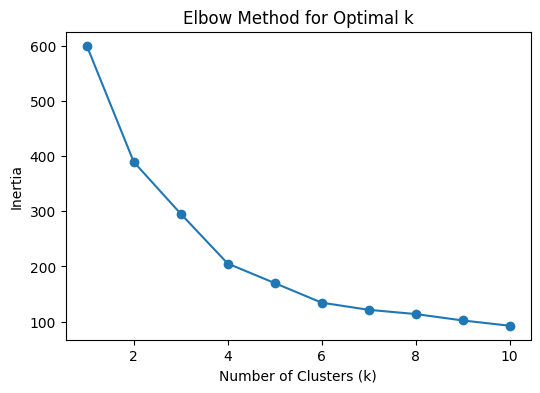

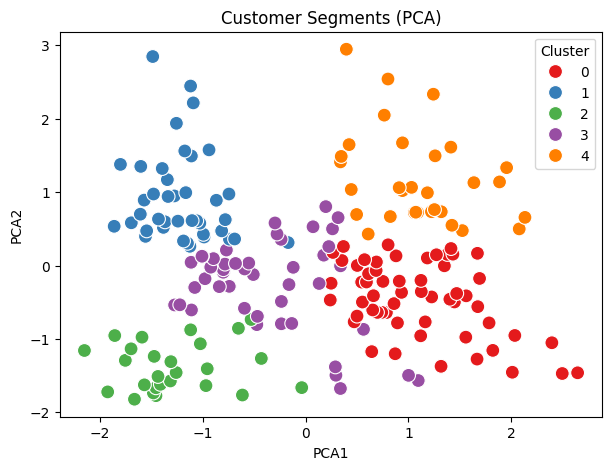

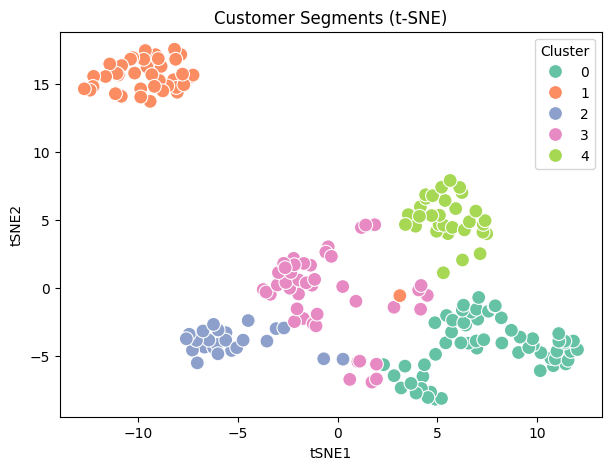

,Age,Annual Income (k$),Spending Score (1-100),Count
Cluster,,,,
0,55.28,47.62,41.71,58
1,32.88,86.10,81.53,40
2,25.77,26.12,74.85,26
3,26.73,54.31,40.91,45
4,44.39,89.77,18.48,31



Cluster 0  (n=58):
Broad value segment — seasonal sales, coupons, convenience messaging.

Cluster 1  (n=40):
High income & high spenders — premium/luxury bundles, concierge service, VIP events.

Cluster 2  (n=26):
Lower income but high engagement — value packs, BNPL/installments, cashback.

Cluster 3  (n=45):
Broad value segment — seasonal sales, coupons, convenience messaging.

Cluster 4  (n=31):
High income but low spenders — targeted promos, personalized offers, loyalty perks to activate.


In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load Dataset
malldf = pd.read_csv("Mall_Customers.csv")

# Data preprocessing
X = malldf[['Age','Annual Income (k$)','Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal K (Elbow Method)
inertia = []
K_range = range(1,11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
malldf['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
malldf['PCA1'] = pca_result[:,0]
malldf['PCA2'] = pca_result[:,1]

plt.figure(figsize=(7,5))
sns.scatterplot(data=malldf, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100)
plt.title("Customer Segments (PCA)")
plt.show()

# t-SNE Visualization (optional - slower)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)
malldf['tSNE1'] = tsne_result[:,0]
malldf['tSNE2'] = tsne_result[:,1]

plt.figure(figsize=(7,5))
sns.scatterplot(data=malldf, x='tSNE1', y='tSNE2', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segments (t-SNE)")
plt.show()

# Analyze each segment
# Select only numeric columns for summary
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

cluster_summary = (
    malldf.groupby('Cluster')[num_cols]
      .mean()
      .round(2)
)

# Add size of each cluster
cluster_summary['Count'] = malldf['Cluster'].value_counts().sort_index()

display(cluster_summary)

# Suggest marketing strategies
for cluster_id, row in cluster_summary.iterrows():
    age   = row['Age']
    income = row['Annual Income (k$)']
    score  = row['Spending Score (1-100)']

    print(f"\nCluster {cluster_id}  (n={int(row['Count'])}):")
    if income > 70 and score > 60:
        print("High income & high spenders — premium/luxury bundles, concierge service, VIP events.")
    elif income > 70 and score < 40:
        print("High income but low spenders — targeted promos, personalized offers, loyalty perks to activate.")
    elif income < 40 and score > 60:
        print("Lower income but high engagement — value packs, BNPL/installments, cashback.")
    elif age < 30 and score > 50:
        print("Young, active shoppers — trendy drops, influencer/UGC, social-only offers.")
    else:
        print("Broad value segment — seasonal sales, coupons, convenience messaging.")

These visualizations show the results of a customer segmentation analysis using a clustering algorithm, likely K-Means, on the mall customer data. They illustrate how customers were grouped into distinct segments and how those segments can be interpreted.

1. **Elbow Method for Optimal K:**

This plot is used to determine the optimal number of clusters for the K-Means algorithm.

The x-axis represents the number of clusters (k).

The y-axis represents the inertia, which is the sum of squared distances of samples to their closest cluster center.

The goal is to find the "elbow" point, where the rate of decrease in inertia slows down significantly. In this plot, the elbow appears to be at k = 5, suggesting that grouping the customers into 5 clusters is the most effective choice.

2. **Customer Segments (PCA & t-SNE):**

These scatter plots visualize the customer segments after applying dimensionality reduction techniques: Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE).

Both plots show the customers grouped into 5 clusters, each represented by a different color. The goal of these visualizations is to confirm that the clusters are well-separated and distinct in a 2D space.

The PCA plot shows the data projected onto the first two principal components (PCA1 and PCA2), which capture the most variance.

The t-SNE plot is better for visualizing complex, non-linear relationships and shows a cleaner separation of the clusters. This confirms the clustering algorithm successfully identified distinct groups.

3. **Cluster Characteristics and Interpretation:**

The final set of visualizations provides a summary table and a textual description of each customer segment. This is the most crucial part of the analysis, as it gives meaning to the clusters.

Cluster 0 (Orange): Characterized by high average age (~55) and low average spending score (~42). These are likely "Broad value segment" shoppers, who respond to seasonal sales and coupons.

Cluster 1 (Red): This group has a high average annual income (~$86k) and a high average spending score (~81). These are the "High income & high spenders," who could be targeted with luxury bundles, concierge services, and VIP events.

Cluster 2 (Blue): This segment has a low average age (~26) and a high average spending score (~74). These are the "Young, active shoppers" or "High engagement shoppers" that respond to value packs, cashback, and installments.

Cluster 3 (Green): This group has a low average age (~27) and a low average spending score (~41). They are similar to Cluster 0 but younger, and also fall into the "Broad value segment."

Cluster 4 (Purple): Characterized by high average income (~$90k) but a very low average spending score (~18). These are the "High income but low spenders" who need to be targeted with personalized offers and loyalty perks to encourage them to spend more.

In summary, these visualizations complete the customer segmentation workflow by first identifying the optimal number of clusters, then visualizing the resulting groups, and finally providing a clear, actionable profile for each customer segment.